In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("FinancialMarketData.xlsx - EWS.csv")
# To display the top 5 rows 
df.shape   

(1111, 44)

In [3]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [4]:
# describing the data
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


Text(0.5, 1.0, 'VIX vs DXY')

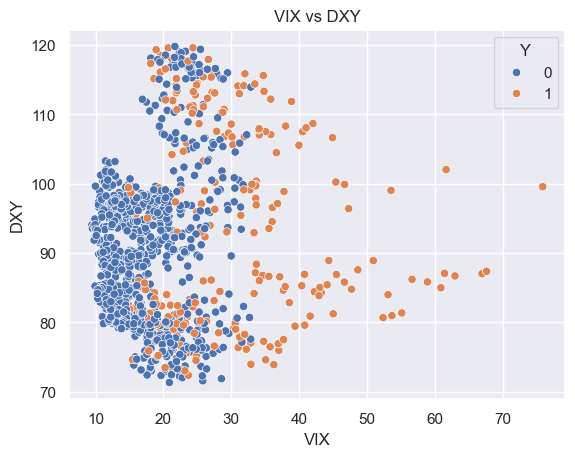

In [5]:
sns.scatterplot(data=df, x="VIX",y="DXY", hue="Y")
plt.title("VIX vs DXY")

<Axes: xlabel='Data', ylabel='VIX'>

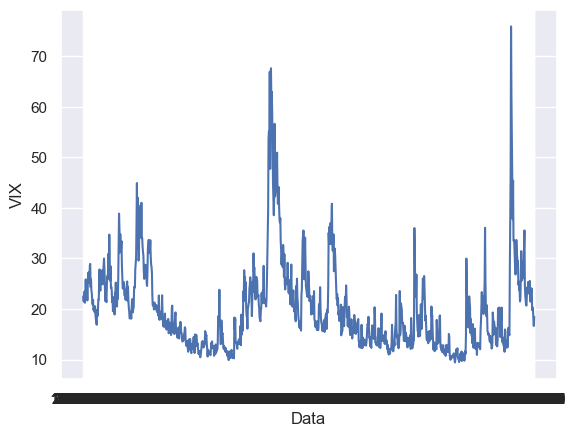

In [6]:
sns.lineplot(data=df, x="Data",y="VIX")

<Axes: xlabel='Data', ylabel='DXY'>

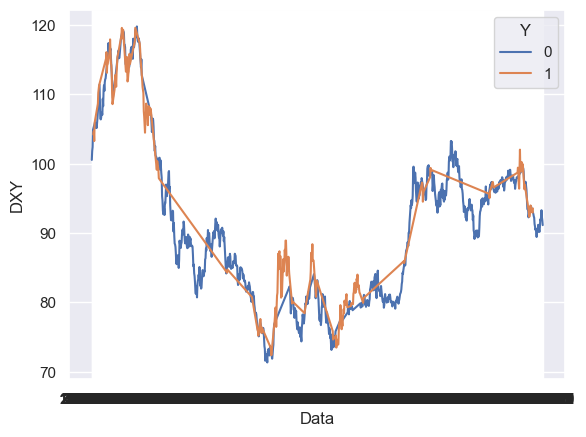

In [7]:
sns.lineplot(data=df, x="Data",y="DXY", hue="Y")

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Assuming df is already defined with 'VIX' and 'Y' columns
# print(df)
X = df[['VIX']]
y = df['Y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print("\nClassification Report:\n", classification_rep)

In [9]:
# eval the model and save the model
def evaluate_and_save_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test,y_pred)}")

In [10]:
lr_model = LogisticRegression(random_state=42)
evaluate_and_save_model(lr_model, X_train, X_test, y_train, y_test)

dt_model = DecisionTreeClassifier(random_state = 42)
evaluate_and_save_model(dt_model, X_train,X_test,y_train,y_test)

rf_model = RandomForestClassifier(random_state = 42)
evaluate_and_save_model(rf_model, X_train,X_test,y_train,y_test)

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train,X_test,y_train,y_test)

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train,X_test,y_train,y_test)

svm_model = SVC(random_state = 42)
evaluate_and_save_model(svm_model, X_train,X_test,y_train,y_test)

LogisticRegression Accuracy: 0.8475

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       177
           1       0.71      0.43      0.54        46

    accuracy                           0.85       223
   macro avg       0.79      0.69      0.72       223
weighted avg       0.84      0.85      0.83       223

DecisionTreeClassifier Accuracy: 0.8072

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       177
           1       0.54      0.48      0.51        46

    accuracy                           0.81       223
   macro avg       0.70      0.69      0.69       223
weighted avg       0.80      0.81      0.80       223

RandomForestClassifier Accuracy: 0.8072

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       177
           1       0.54      0.48      0.51      

In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles